### We can use the `cohorts` module to filter down to a cohort of ICU stays

In [1]:
from chatto_transform.sessions.mimic import cohorts

### We start by making a new `Cohort`.

In [2]:
my_cohort = cohorts.Cohort()

### Next we apply various filters using widgets.

### We can start by filtering medications. In this example, select *Acetaminophen-IV* from the select box, then click *Execute*.

In [3]:
my_cohort.filter_medications()

### Now let's filter down to ICU stays that had Sodium-related labs.

### Click the select box and begin by typing the first few letters of "Sodium". Now hold down Shift while clicking all of the *Sodium* lab events in the list.

### Then click *Execute* to lock it in.

In [4]:
my_cohort.filter_labevents()

### We can filter down to ICU stays where there was a diagnoses or procedure with certain ICD9 codes.

### In the text field, type in `428%` and press Enter. Then click *Execute*.

#### The `%` is a wildcard - it will match any ICD9 code starting with 428- in this case it has to do with heart failure.

In [6]:
my_cohort.filter_icd9_codes()

### Finally, let's filter down to ICU stays where the patient died within 12 months of hospital admission.

### Click the "Died with 12 months of hospital admission" radio button, then click *Execute*.

In [7]:
my_cohort.filter_death()

### Now that we have selected various filters for our cohort, let's get some summary info about it.

### Note: This will take a minute or two to finish running the first time.

In [10]:
my_cohort.summary()

,summary
icustays,89
hadms,75
patients,74
icustay_deaths,29
hadm_deaths,44
12mo_deaths,89
first_careunits,6
last_careunits,6
avg_icu_los,8 days 13:16:26.292134
avg_hadm_los,17 days 18:33:06.741573


### We can get all the `icustay_id`'s for our cohort...

In [9]:
my_cohort.icustay_ids()

,icustay_ids
0,215525
1,271548
2,267968
3,239981
4,245884
...,...
84,274258
85,205777
86,278168
87,268249


### ...Or load all the data right here and get to analyzing.

In [11]:
df = my_cohort.load()

In [12]:
df

,row_id,subject_id,hadm_id,icustay_id,dbsource,...,first_wardid,last_wardid,intime,outtime,los
6192,7043,5544,116545,215525,metavision,...,52,52,2123-11-10 19:06:14,2123-11-15 21:07:21,5.0841
9916,15479,12122,100779,271548,metavision,...,14,14,2203-08-03 16:33:23,2203-08-29 19:36:06,26.1269
10325,13758,10814,119849,267968,metavision,...,23,23,2163-11-04 19:45:55,2163-11-17 23:24:49,13.1520
10751,15514,12149,103934,239981,metavision,...,7,7,2121-08-10 16:31:41,2121-08-12 14:43:13,1.9247
19229,10705,8426,142053,245884,metavision,...,7,7,2115-05-17 17:55:57,2115-05-21 01:37:22,3.3204
...,...,...,...,...,...,...,...,...,...,...,...
60400,48401,60659,133081,274258,metavision,...,50,50,2128-05-20 18:58:51,2128-05-21 13:00:07,0.7509
60401,48402,60659,133081,205777,metavision,...,23,23,2128-05-24 01:07:17,2128-05-29 04:13:15,5.1291
60560,49942,65370,165569,278168,metavision,...,12,15,2190-11-23 12:38:13,2190-12-02 11:53:24,8.9689
60858,50381,66571,117918,268249,metavision,...,15,15,2103-07-12 15:09:44,2103-07-24 17:37:31,12.1026


### I dunno, let's look at a plot of our cohort's lengths of stay in days

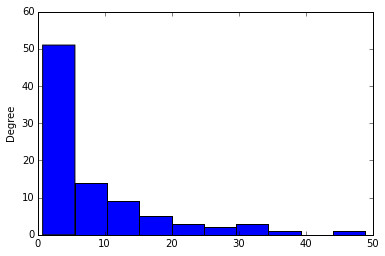

In [13]:
%matplotlib inline
df['los'].plot(kind='hist')